In [ ]:
# clone YOLOv5 repository
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
!git reset --hard 064365d8683fd002e9ad789c1e91fa3d021b44f0

Cloning into 'yolov5'...
remote: Enumerating objects: 15814, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 15814 (delta 9), reused 22 (delta 2), pack-reused 15769
Receiving objects: 100% (15814/15814), 14.59 MiB | 9.57 MiB/s, done.
Resolving deltas: 100% (10823/10823), done.
/content/yolov5
HEAD is now at 064365d Update parse_opt() in export.py to work as in train.py (#10789)


In [ ]:
# install dependencies as necessary
!pip install -qr requirements.txt  # install dependencies (ignore errors)

import torch
from IPython.display import Image, clear_output  # to display images
from utils.downloads import attempt_download  # to download models/datasets

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.1 MB/s eta 0:00:00
Setup complete. Using torch 2.0.1+cu118 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15101MB, multi_processor_count=40)


In [ ]:
!pip install -q roboflow
from roboflow import Roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.8 MB/s eta 0:00:00


In [ ]:
%cd /content/yolov5
#after following the link above, recieve python code with these fields filled in

from roboflow import Roboflow
rf = Roboflow(api_key="QkETXXAG2vIMMnWRt0cR")
project = rf.workspace("joseph-nelson").project("chess-pieces-new")
dataset = project.version(24).download("yolov5")


/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Chess-Pieces-24 in yolov5pytorch:: 100%|██████████| 1398/1398 [00:01<00:00, 926.13it/s] 


In [ ]:
# train yolov5s on custom data for 100 epochs
# time its performance
%%time
%cd /content/yolov5
!python train.py --img 416 --batch 16 --epochs 100 --data {dataset.location}/data.yaml  --weights yolov5s.pt  --cache

/content/yolov5
2023-07-10 16:51:15.385667: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-10 16:51:16.251112: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Chess-Pieces-24/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1

In [ ]:
!zip -r runs.zip runs

  adding: runs/ (stored 0%)
  adding: runs/train/ (stored 0%)
  adding: runs/train/exp/ (stored 0%)
  adding: runs/train/exp/val_batch0_labels.jpg (deflated 8%)
  adding: runs/train/exp/opt.yaml (deflated 48%)
  adding: runs/train/exp/events.out.tfevents.1688951035.dd2dcb1f3ca7.2055.0 (deflated 27%)
  adding: runs/train/exp/results.png (deflated 11%)
  adding: runs/train/exp/train_batch1.jpg (deflated 2%)
  adding: runs/train/exp/F1_curve.png (deflated 7%)
  adding: runs/train/exp/val_batch0_pred.jpg (deflated 7%)
  adding: runs/train/exp/results.csv (deflated 83%)
  adding: runs/train/exp/weights/ (stored 0%)
  adding: runs/train/exp/weights/last.pt (deflated 8%)
  adding: runs/train/exp/weights/best.pt (deflated 8%)
  adding: runs/train/exp/P_curve.png (deflated 8%)
  adding: runs/train/exp/labels_correlogram.jpg (deflated 36%)
  adding: runs/train/exp/train_batch0.jpg (deflated 2%)
  adding: runs/train/exp/R_curve.png (deflated 10%)
  adding: runs/train/exp/confusion_matrix.png (def

In [ ]:
# when we ran this, we saw .007 second inference time. That is 140 FPS on a TESLA P100!
# use the best weights!
%cd /content/yolov5/
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.4 --source {dataset.location}/test/images

/content/yolov5
detect: weights=['runs/train/exp/weights/best.pt'], source=/content/yolov5/Chess-Pieces-24/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-72-g064365d Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7045186 parameters, 0 gradients, 15.9 GFLOPs
image 1/29 /content/yolov5/Chess-Pieces-24/test/images/0b47311f426ff926578c9d738d683e76_jpg.rf.40183eae584a653181bbd795ba3c353f.jpg: 416x416 1 white-bishop, 7.4ms
image 2/29 /content/yolov5/Chess-Pieces-24/test/images/1c0060ef868bdc326ce5e6389cb6732f_jpg.rf.f02cd668d26a53d9bf001497992b3657.jpg: 416x416 1 wh

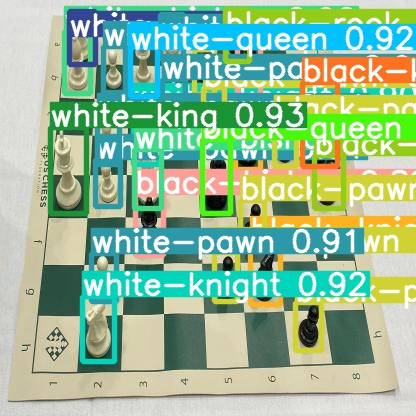

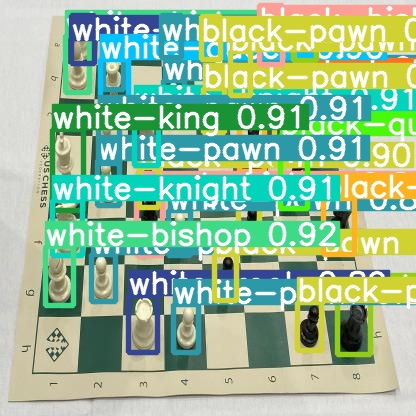

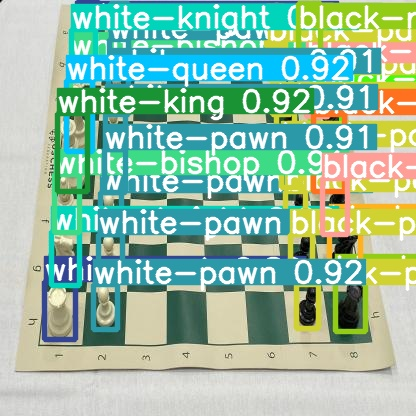

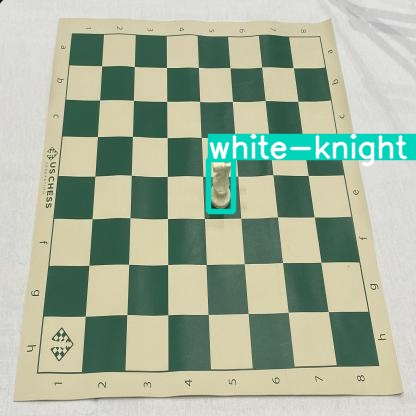

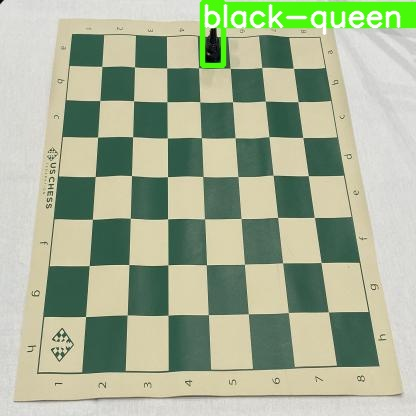

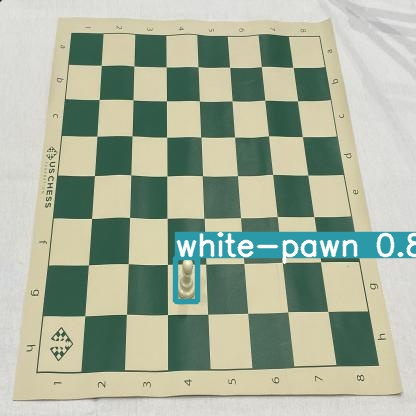

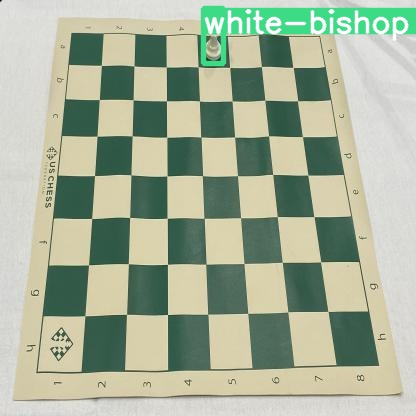

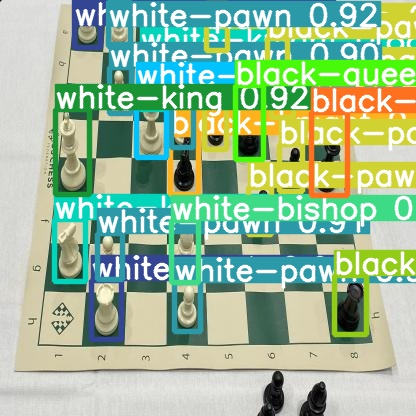

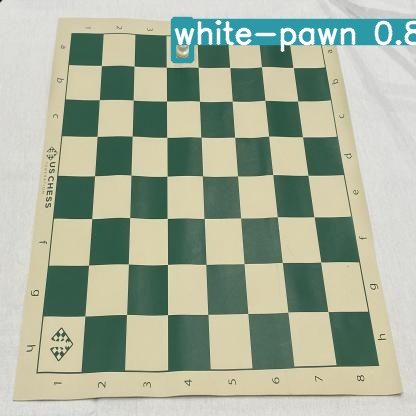

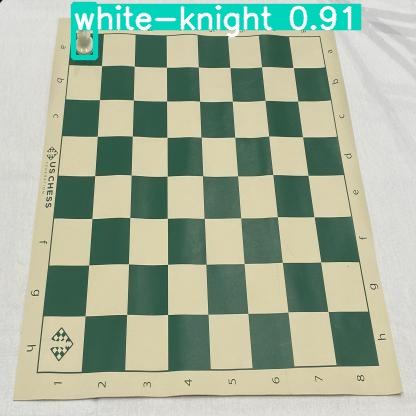

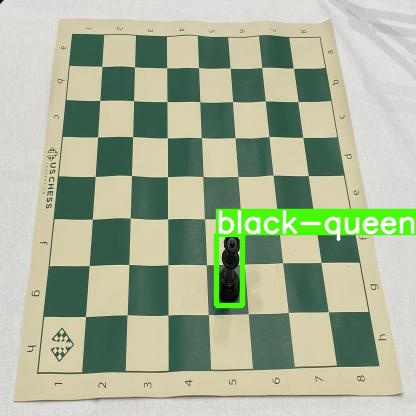

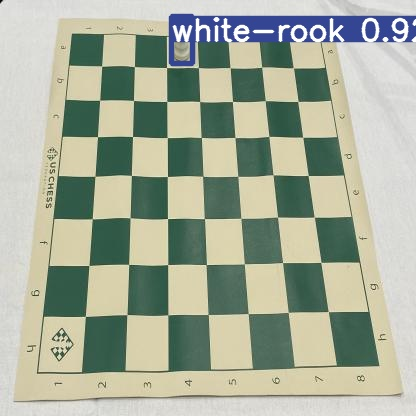

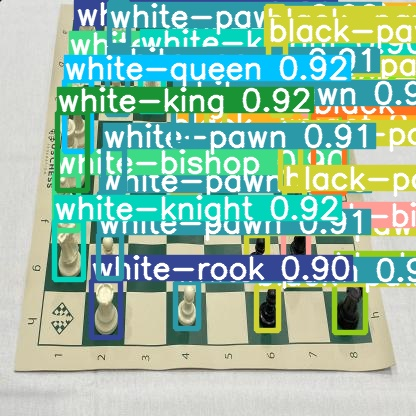

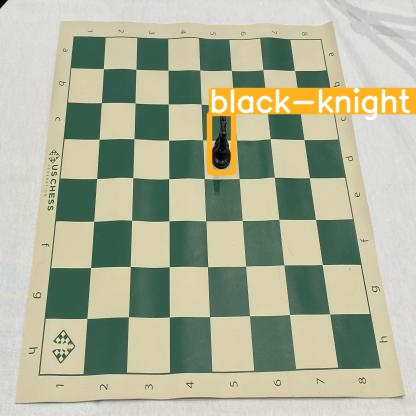

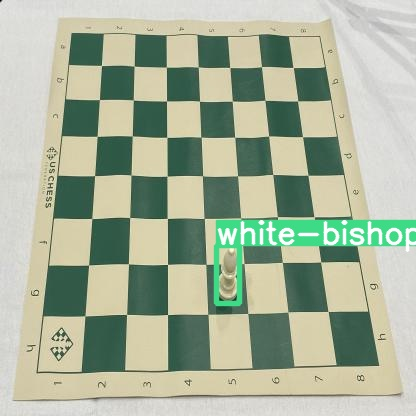

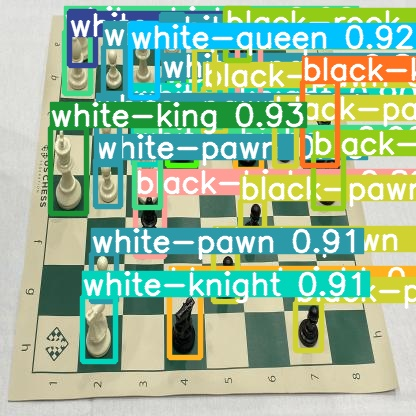

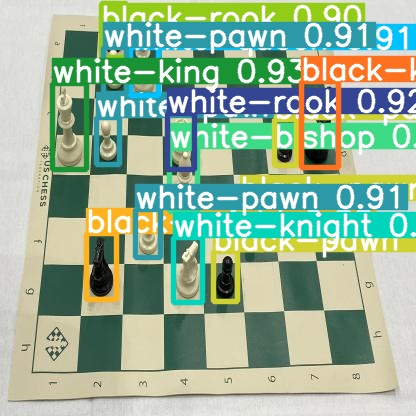

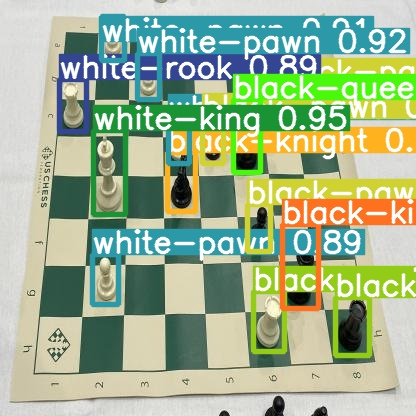

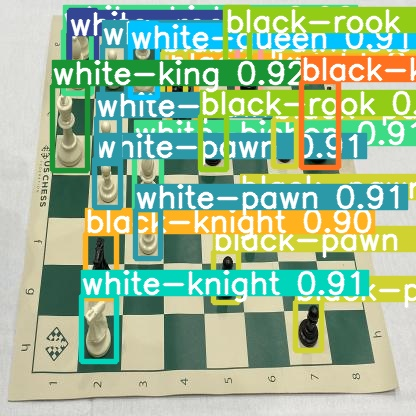

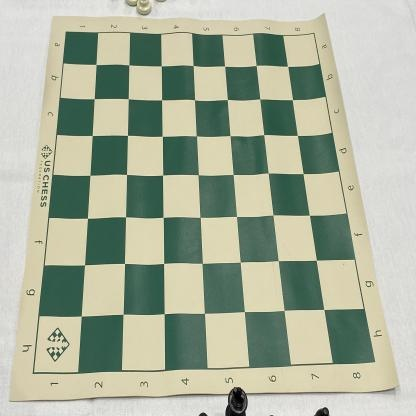

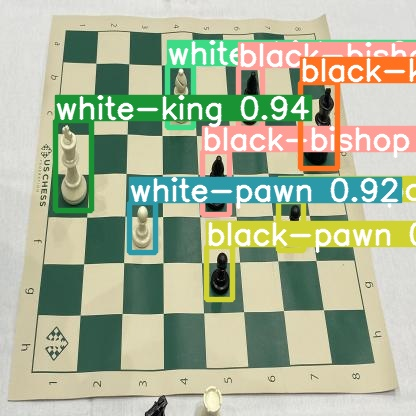

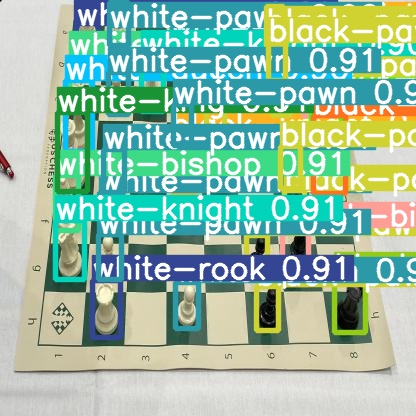

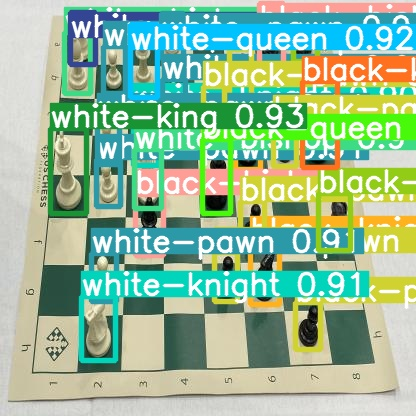

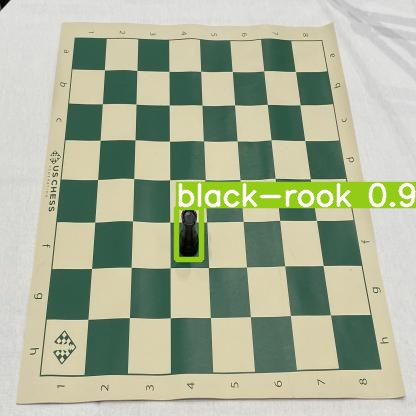

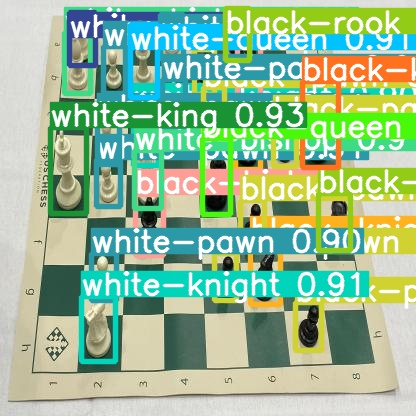

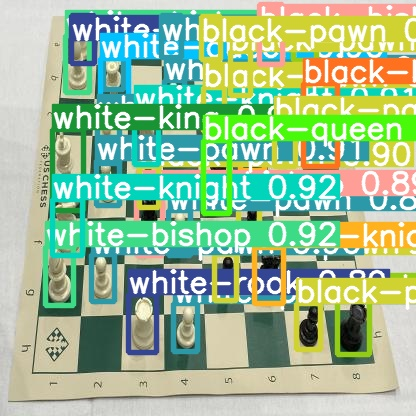

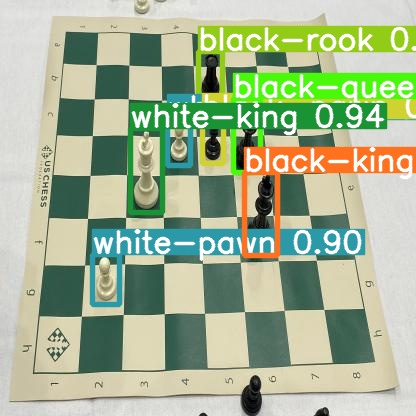

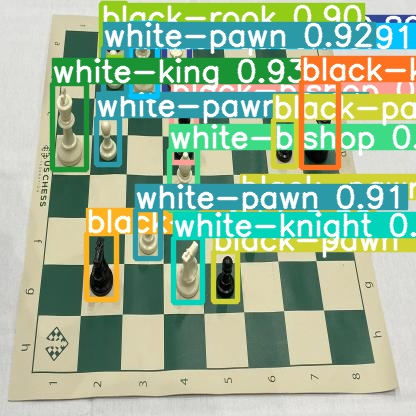

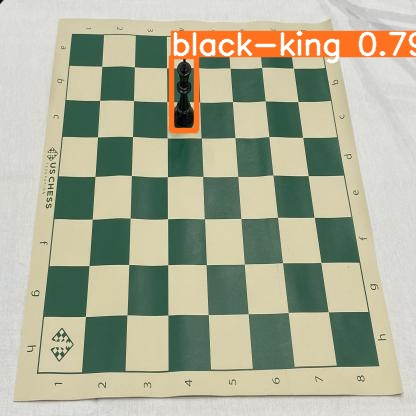

In [ ]:
#display inference on ALL test images
#this looks much better with longer training above

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp5/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!zip -r runs02.zip runs

  adding: runs/ (stored 0%)
  adding: runs/train/ (stored 0%)
  adding: runs/train/exp/ (stored 0%)
  adding: runs/train/exp/val_batch0_labels.jpg (deflated 8%)
  adding: runs/train/exp/opt.yaml (deflated 48%)
  adding: runs/train/exp/events.out.tfevents.1688951035.dd2dcb1f3ca7.2055.0 (deflated 27%)
  adding: runs/train/exp/results.png (deflated 11%)
  adding: runs/train/exp/train_batch1.jpg (deflated 2%)
  adding: runs/train/exp/F1_curve.png (deflated 7%)
  adding: runs/train/exp/val_batch0_pred.jpg (deflated 7%)
  adding: runs/train/exp/results.csv (deflated 83%)
  adding: runs/train/exp/weights/ (stored 0%)
  adding: runs/train/exp/weights/last.pt (deflated 8%)
  adding: runs/train/exp/weights/best.pt (deflated 8%)
  adding: runs/train/exp/P_curve.png (deflated 8%)
  adding: runs/train/exp/labels_correlogram.jpg (deflated 36%)
  adding: runs/train/exp/train_batch0.jpg (deflated 2%)
  adding: runs/train/exp/R_curve.png (deflated 10%)
  adding: runs/train/exp/confusion_matrix.png (def